# Training

## Introduction
The structure of the file is the following:
1. Importing the files and the metadata
2. Dimensionality reduction
3. Feature selection
4. Unsupervised learning
    * K-means clustering
    * Hierarchical clustering
5. Supervised learning
    *

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install xgboost
!pip install umap-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, validation_curve, learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import umap.umap_ as umap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scanpy as sc

# 1. Importing the files and metadata (checked)

We start by importing the dataset we will use for the training part of the analysis: the filtered and normalized one

In [2]:
df_smartseq_pathMFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_smartseq_MFiltNorm = pd.read_csv(df_smartseq_pathMFiltNorm, delimiter=' ')

In [3]:
df_dropseq_pathMFiltNorm = '../ai_lab/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt'
df_dropseq_MFiltNorm = pd.read_csv(df_dropseq_pathMFiltNorm, delimiter=' ')

We take a look at the structure of this dataset

In [4]:
df_smartseq_MFiltNorm.head()

,output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam,...,output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
DDIT4,0,8739,13098,2880,7777,208,750,127,10313,13523,...,341,5545,5757,8337,2579,79,167,10186,238,60
ANGPTL4,48,2101,14032,356,5661,0,0,0,850,10110,...,10,2085,698,2383,65,5,1,3147,41,0
CALML5,0,55,0,0,4383,1902,0,0,0,0,...,0,1587,0,0,0,0,0,0,2867,0
KRT14,321,96,0,6211,0,0,5050,462,2127,0,...,0,0,3077,529,156,2098,27,149,814,7
CCNB1,298,1824,1616,3,145,378,66,58,605,1444,...,204,26,50,588,411,554,3585,1012,2207,477


We then take the transpose in order to have cells as rows and features as columns and then look at the structure.

In [5]:
df_dropseq_MFiltNorm.head()

,AAAAAACCCGGC_Normoxia,AAAACCGGATGC_Normoxia,AAAACGAGCTAG_Normoxia,AAAACTTCCCCG_Normoxia,AAAAGCCTACCC_Normoxia,AAACACAAATCT_Normoxia,AAACCAAGCCCA_Normoxia,AAACCATGCACT_Normoxia,AAACCTCCGGCT_Normoxia,AAACGCCGGTCC_Normoxia,...,TTTTCTGATGGT_Hypoxia,TTTTGATTCAGA_Hypoxia,TTTTGCAACTGA_Hypoxia,TTTTGCCGGGCC_Hypoxia,TTTTGTTAGCCT_Hypoxia,TTTTTACCAATC_Hypoxia,TTTTTCCGTGCA_Hypoxia,TTTTTGCCTGGG_Hypoxia,TTTTTGTAACAG_Hypoxia,TTTTTTTGAATC_Hypoxia
H1-5,2,2,5,1,0,0,0,0,1,0,...,0,1,0,2,1,0,0,0,3,1
MALAT1,3,3,2,3,12,3,1,2,0,0,...,3,1,1,1,4,0,4,1,3,6
MT-RNR2,0,0,0,0,0,0,0,0,0,1,...,1,2,2,2,0,0,1,0,1,0
ARVCF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BCYRN1,0,1,1,0,0,1,1,2,0,3,...,1,1,0,1,1,0,0,1,0,0


In [6]:
df_smartseq_MFiltNormT = df_smartseq_MFiltNorm.T
df_smartseq_MFiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [7]:
df_dropseq_MFiltNormT = df_dropseq_MFiltNorm.T
df_dropseq_MFiltNormT.head()

,H1-5,MALAT1,MT-RNR2,ARVCF,BCYRN1,ATXN7L2,IGFBP3,H1-3,CTIF,RNF123,...,BATF3,CDKN3,DLD,PMPCA,ZNF165,SCCPDH,NTAN1,CLIP2,DUSP23,ZNF682
AAAAAACCCGGC_Normoxia,2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACCGGATGC_Normoxia,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACGAGCTAG_Normoxia,5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACTTCCCCG_Normoxia,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGCCTACCC_Normoxia,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we import the metadata and add the target variable to the dataset.

In [8]:
df_metaM_path = '../ai_lab/SmartSeq/MCF7_SmartS_MetaData.tsv'
df_metaM = pd.read_csv(df_metaM_path, delimiter='\t')
df_metaM.set_index('Filename', inplace=True)

We define functions to add the target variable for each type of sequencing:

In [9]:
def row_target(row):
    if 'Normoxia' in row.name:
        return 1
    else:
        return 0

def add_target_column_dropseq(dataframe):
    dataframe['Target'] = dataframe.apply(row_target, axis=1)
    return dataframe

In [10]:
def add_target_column_smartseq(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    print
    return merged_data

In [11]:
merged_smartseq = add_target_column_smartseq(df_smartseq_MFiltNormT, df_metaM_path, 'Condition', 'category_Normo')

In [12]:
merged_dropseq = add_target_column_dropseq(df_dropseq_MFiltNormT)

We can see that the last column of the dataset is the target one. The information is encoded as 1 in the case of Normoxia, 0 in the case of Hypoxia.

In [13]:
merged_smartseq.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,10,136,0,0,29,0,29,0,0,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,0,264,0,134,68,0,213,0,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,0,38,0,0,0,0,92,0,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,0,16,0,4,1,0,1,0,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,1,25,0,0,0,0,128,0,0,0


In [14]:
merged_dropseq.head()

,H1-5,MALAT1,MT-RNR2,ARVCF,BCYRN1,ATXN7L2,IGFBP3,H1-3,CTIF,RNF123,...,CDKN3,DLD,PMPCA,ZNF165,SCCPDH,NTAN1,CLIP2,DUSP23,ZNF682,Target
AAAAAACCCGGC_Normoxia,2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAACCGGATGC_Normoxia,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAACGAGCTAG_Normoxia,5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAACTTCCCCG_Normoxia,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAAGCCTACCC_Normoxia,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 2. Dimensionality reduction (checked)

In this section we try two different dimensionality reduction techniques. This can be useful in case some of our models take a long time to train or to infer with high dimensional data.

In [78]:
def pca_dr(dataset):
    # we rescale the data for the dimensionality reduction
    df_dim_red = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns, index=dataset.index)
    pca = PCA()
    pca_array = pca.fit_transform(df_dim_red)
    pca_array_df = pd.DataFrame(pca_array, columns=[f'PC{i+1}' for i in range(pca_array.shape[1])], index=df_dim_red.index)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumsum)
    nec_dimensions = np.argmax(cumsum >= 0.95)plt.scatter(nec_dimensions, 0.95, color='red')
    plt.plot([nec_dimensions, nec_dimensions], [0, 0.95], linestyle='--', color='black')
    plt.plot([0, nec_dimensions], [0.95, 0.95], linestyle='--', color='black')
    print(f"The number of dimensions needed to explain 95% of the variance is {nec_dimensions}")
    
    pca_array_df = pca_array_df[[f'PC{i+1}' for i in range(nec_dimensions)]]return pca_array_df, nec_dimensions

The number of dimensions needed to explain 95% of the variance is 156


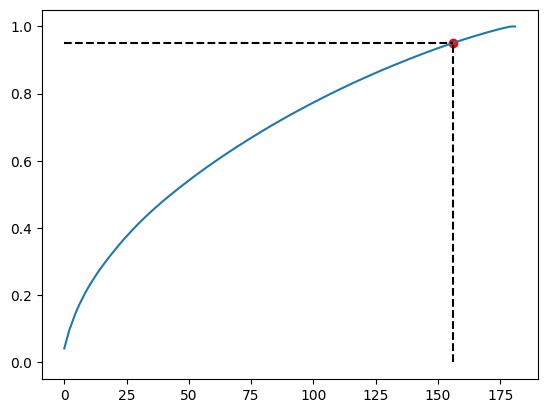

In [79]:
smartseq_pca, smartseq_dimensions = pca_dr(df_smartseq_MFiltNormT)

The number of dimensions needed to explain 95% of the variance is 2591


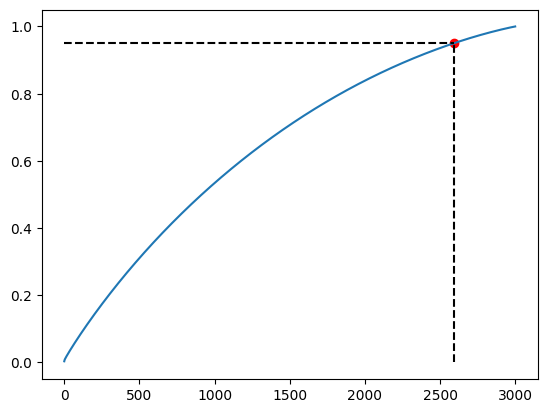

In [80]:
smartseq_pca = add_target_column_smartseq(smartseq_pca, df_metaM_path, 'Condition', 'category_Normo')

In [ ]:
dropseq_pca, dropseq_dimensions = pca_dr(df_dropseq_MFiltNormT)

In [ ]:
dropseq_pca = add_target_column_dropseq(dropseq_pca)

The second approach we use is UMAP (Uniform Manifold Approximation and Projection).

In [87]:
def umap_dr(dataset, dropseq=False):
    # now, we use umap. since it's harder to estimate the explained variance, we use a heuristic: the number of components will be the same as in PCA
    df_dim_red = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns, index=dataset.index)
    if dropseq:
        nec_dimensions = dropseq_dimensions
    else:
        nec_dimensions = smartseq_dimensions
    reducer = umap.UMAP(n_components=nec_dimensions, n_neighbors=50) #qualitatively, 50 neighbors seemed to work well for out scope
    embedding = reducer.fit_transform(df_dim_red)
    columns = [f'UMAP{i+1}' for i in range(embedding.shape[1])]
    umap_embedding_df = pd.DataFrame(embedding, columns=columns, index=df_dim_red.index)
    
    return umap_embedding_df

In [88]:
smartseq_umap = umap_dr(df_smartseq_MFiltNormT, False)

In [ ]:
smart_umap = add_target_column_smartseq(smartseq_umap, df_metaM_path, 'Condition', 'category_Normo')

In [94]:
smartseq_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP147,UMAP148,UMAP149,UMAP150,UMAP151,UMAP152,UMAP153,UMAP154,UMAP155,UMAP156
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,1.933421,3.043131,4.925458,3.278273,7.143380,4.824403,8.809933,5.771907,4.482440,5.814340,...,4.223405,6.671203,5.274122,6.449116,4.625022,4.647979,4.413197,3.148154,4.869022,4.055204
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,2.083114,2.846597,4.709572,3.323032,7.175004,4.907017,8.910170,5.598258,4.474655,5.664087,...,4.157103,6.665139,5.155413,6.344740,4.602139,4.456013,4.330006,3.209368,4.985682,3.671340
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,2.218545,2.799596,4.795841,3.306323,7.081577,4.925307,8.907449,5.541768,4.456720,5.729381,...,4.262327,6.693833,5.169695,6.330956,4.607818,4.492558,4.341030,3.193904,4.954165,3.654172
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2.026960,2.889002,4.730323,3.309753,7.107037,4.890087,8.865561,5.699593,4.543344,5.758589,...,4.059206,6.713186,5.256790,6.339942,4.456396,4.365078,4.459802,3.172272,4.965634,3.639698
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,1.910994,3.110238,4.974777,3.379046,7.221349,4.853961,8.902213,5.714777,4.637565,5.846271,...,4.259538,6.592949,5.171988,6.342099,4.660424,4.479886,4.433703,3.170684,4.843271,3.640853


In [91]:
dropseq_umap = umap_dr(df_dropseq_MFiltNormT,True)

In [ ]:
dropseq_umap = add_target_column_dropseq(dropseq_umap)


In [95]:
dropseq_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP2582,UMAP2583,UMAP2584,UMAP2585,UMAP2586,UMAP2587,UMAP2588,UMAP2589,UMAP2590,UMAP2591
AAAAAACCCGGC_Normoxia,0.124346,0.114598,9.288288,9.811451,9.549404,9.227915,9.437924,0.748006,9.266770,6.275010,...,3.193545,5.794318,3.442064,4.523698,4.722635,3.658545,4.716311,3.914387,4.412007,3.770218
AAAACCGGATGC_Normoxia,0.139917,0.115237,9.288766,9.810868,9.539560,9.219449,9.442846,0.753567,9.269452,6.274984,...,3.191044,5.795223,3.439430,4.525460,4.726233,3.656612,4.709257,3.914414,4.410579,3.766826
AAAACGAGCTAG_Normoxia,0.097283,0.072143,9.302511,9.845284,9.550331,9.266126,9.443946,0.758974,9.297004,6.304469,...,3.224659,5.782102,3.445913,4.535906,4.697103,3.661906,4.745238,3.900300,4.407980,3.766068
AAAACTTCCCCG_Normoxia,0.146805,0.090824,9.280848,9.787268,9.562997,9.221280,9.443620,0.736909,9.244291,6.295838,...,3.201828,5.784742,3.434122,4.522042,4.707813,3.652828,4.740108,3.905207,4.407379,3.745457
AAAAGCCTACCC_Normoxia,0.128577,0.119963,9.290288,9.816540,9.548279,9.223348,9.436380,0.746730,9.261856,6.273922,...,3.190103,5.797067,3.438585,4.521152,4.723114,3.658557,4.710448,3.915955,4.409165,3.766876


We now create dictionaries containing the datasets for each sequencing type:

In [104]:
dataset_smartseq = {}
dataset_smartseq['merged dataset'] = merged_smartseq
dataset_smartseq['PCA dataset'] = smartseq_pca
dataset_smartseq['UMAP dataset'] = smartseq_umap

In [111]:
dataset_dropseq = {}
dataset_dropseq['merged dataset'] = merged_dropseq
dataset_dropseq['PCA dataset'] = dropseq_pca
dataset_dropseq['UMAP dataset'] = dropseq_umap

nota: AN GPTL4 PGK1 SONO IMPORTNTI VERMNETE, L HA DETTO LEI

## 3. Feature selection

Another possible approach to reduce the dimensionality of the dataset is to select only the "most significant" features. 

To do so, we will consider as "significant" the genes that are above the CPM threshold (that we will optimize) for at least two samples, and whose q-values, computed as described next, are below 0.05.

In [ ]:
def filter_CPM(data, threshold):
    data_filtered = pd.DataFrame()
    # Keep track of the number of rows removed
    removed_genes = 0
    # Create a mask to filter out rows with low counts
    if 'Target' in data.index:
        data = data.drop('Target')
    mask_thr = data > threshold
    mask_rows = mask_thr.sum(axis=1) >= 2
    data_filtered = data.loc[mask_rows, :]
    return data_filtered

Since we have only two groups (Normoxia and Hypoxia), it could be useful to understand the significant genes to run the Wilcoxon Rank-Sum Test too.

In the Mann-Whitney test, the null hypothesis (usually denoted as $H_0$)
states that there are no significant differences between the probability distributions of the two samples, meaning that both samples are drawn from the same population. 

The alternative hypothesis (usually denoted as $H_1$) asserts that there is a significant difference between the distributions of the two samples, suggesting that one sample stochastically dominates the other.

So we run this test for each gene, and we store the corresponding p-values in a dictionary.


In [ ]:
def wilcoxon_ranksum_test(data):
    normo = data[data["Target"] == 0]
    hypo = data[data["Target"] == 1]
    p_values = {}
    for i in range(data.shape[1]):
        p_values[data.columns[i]] = mannwhitneyu(normo.iloc[:, i], hypo.iloc[:, i], alternative = "two-sided")[1]
    return p_values

Gene expression analysis involves comparing the expression levels of thousands of genes between different experimental conditions.
 Researchers typically conduct statistical testsfor each gene to determine if there are significant differences in expression between the conditions.

However, when performing thousands of statistical tests simultaneously, there's a high chance of observing false positives (genes incorrectly identified as differentially expressed) due to random chance alone. To address this issue, researchers use multiple testing corrections to control the false discovery rate (FDR).
Here's how q-values come into play: by  Benjamini-Hochberg procedure we adjusts the p-values to account for the number of tests performed and controls the FDR.
By using q-values, we can prioritize genes that are more likely to be truly differentially expressed while minimizing the number of false discoveries. 

In [ ]:
def q_value (p_val_dict):
  sorted_list = [[key, value] for (key, value) in sorted(p_val_dict.items(), key=lambda x: x[1])]
  rank = 1
  for p in sorted_list:
    p[1] = p[1] * len(p_val_dict)/rank
    rank += 1
  q_val_dict = dict(sorted_list)
  q_val_dict = (sorted(q_val_dict.items()))
  return q_val_dict

For choosing the optimal number of significant genes, we will combine q-values with CPM threshold.
we will proceed in the following way:
1. We filter the data using the CPM threshold
2. We run the Mann-Whitney test on the remaining features, computing the p-values (and then the q-values) for each gene
3. We keep only the ones with an associated q value >0.05
4. We perform gridsearch to find the optimal value for the threshold

It's clear that an optimal value for the threshold is 30, and by choosing such a value we will keep approximately 428 features

In [ ]:
def grid_search_thresholds(data, thresholds, smartseq=True):
    n_features = []
    for threshold in thresholds:
        data_filtered = filter_CPM(data, threshold)
        data_filtered = data_filtered.T
        print("Number of features dropped for CPM", threshold, ":", data.shape[0]-data_filtered.shape[1])
        if smartseq:
            data_filtered = add_target_column_smartseq(data_filtered, df_metaH_path, 'Condition', 'category_Normo')
        else:
            data_filtered = add_target_column_dropseq(data_filtered)
        p_vals = wilcoxon_ranksum_test(data_filtered)
        count = [value for value in q_value(p_vals) if value[1] <= 0.05]
        count = [value[0] for value in count]
        # Delete all columns in count that are not in colsdatafilt
        finaldf = data_filtered[count]
        print("Number of features dropped after q-value test for threshold", threshold, ":", data_filtered.shape[1]-len(count))
        n_features.append(finaldf.shape[1])
        # Plot the number of features we drop for each treshold value
    plt.plot(thresholds, n_features)
    plt.xlabel('Threshold')
    plt.ylabel('Number of features')
    plt.title('Number of significant features for each threshold value')
    plt.axvline(x=30, color = "red", linestyle = "--", label = "Optimal Threshold")
    plt.legend()
    plt.show()  
    return n_features

We can plot the variance on a scatter plot

In [ ]:
def scatter_plot_variance(dataset, threshold):
    filt_first = filter_CPM(dataset.T, threshold).T
    adata = sc.AnnData(filt_first)

    sc.pp.highly_variable_genes(adata, n_top_genes=200, flavor='seurat_v3')
    # Note since our dataset is already log-transformed as the function 'Expects logarithmized data'
    sc.pl.highly_variable_genes(adata)

In [20]:
def filtering(dataset, threshold):
    datasetT = dataset.T
    filteredcpm = filter_CPM(datasetT, threshold)
    print(filteredcpm)
    print("Number of rows before filtering:", datasetT.shape[0])

    p_values_mannwhitneyu = wilcoxon_ranksum_test(merged_smartseq)

    thresholds = np.linspace(start = 10, stop = 100, num = 10)
    nfeatures = grid_search_thresholds(datasetT, thresholds)

    merged_filtered = filter_CPM(datasetT, 30)
    merged_filtered = merged_filtered.T
    merged_filtered = add_target_column_smartseq(merged_filtered, df_metaH_path, 'Condition', 'category_Normo')
    pvals = wilcoxon_ranksum_test(merged_filtered)
    qvals = q_value(pvals)
    count = [value for value in qvals if value[1] <= 0.05]
    count = [value[0] for value in count]
    merged_filtered = merged_filtered[count]

    print(merged_filtered.shape)
    

           output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam  \
DDIT4                                                      0                     
ANGPTL4                                                   48                     
CALML5                                                     0                     
KRT14                                                    321                     
CCNB1                                                    298                     
...                                                      ...                     
VCPIP1                                                     0                     
LINC02693                                                 29                     
NEAT1                                                     29                     
ZDHHC23                                                    0                     
ODAD2                                                      0                     

           outp

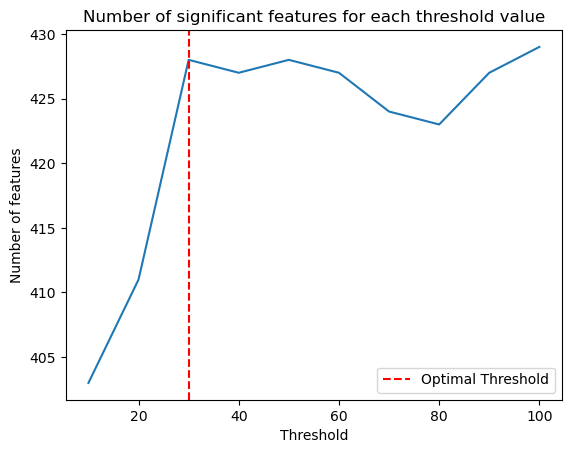

(182, 428)


In [21]:
filtering(df_smartseq_MFiltNormT, 20)

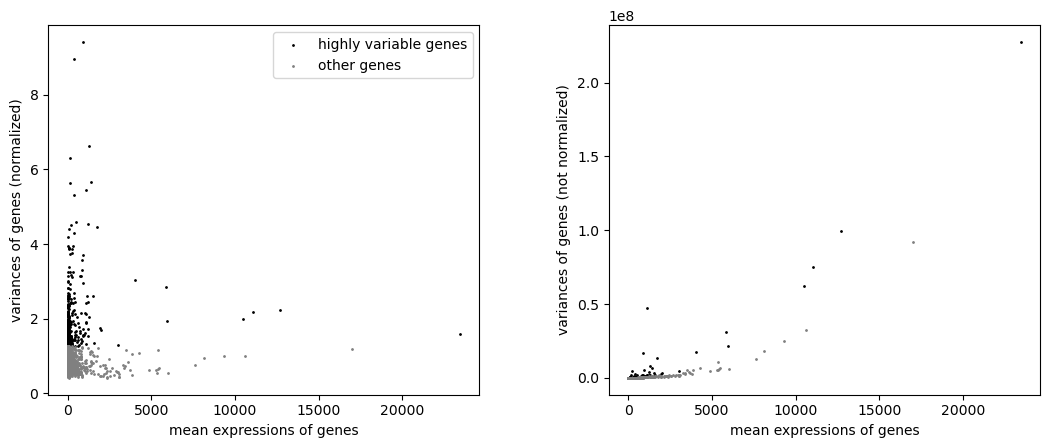

In [26]:
scatter_plot_variance(df_smartseq_MFiltNormT, threshold=30)

# 3. Unsupervised learning 
We now prooceed doing clustering.
In particular, we use two different approaches: K means clustering and hierarchical clustering.

We start with K means.
In order to visualize this clusters we found in 3D we apply PCA on the dataset.

In [ ]:
data_scaled_smartseq = pd.DataFrame(StandardScaler().fit_transform(df_smartseq_MFiltNorm), columns=df_smartseq_MFiltNorm.columns)
data_scaled_dropseq = pd.DataFrame(StandardScaler().fit_transform(df_dropseq_MFiltNorm), columns=df_dropseq_MFiltNorm.columns)

def k_means_clustering(dataset):
    # first, rescale the data
    data_scaled = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    str_labels = [str(label) for label in cluster_labels]
    data_scaled ['c']= cluster_labels

    # Perform PCA to reduce the data to 3 dimensions, so that it can be visualized
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_scaled)

    # Create DataFrame for clustered data
    df_clustered = pd.DataFrame({
        'PC1': pca_result[:, 0],
        'PC2': pca_result[:, 1],
        'PC3': pca_result[:, 2],
        'Cluster': str_labels
    })

    return df_clustered

def plot_clusters(df_clustered):
    fig = px.scatter_3d(df_clustered, x='PC1', y='PC2', z='PC3', color='Cluster',
                        symbol='Cluster', opacity=0.7, size_max=10,
                        title='KMeans Clustering in 3D with PCA')

    fig.show()

In [ ]:
k_means_smartseq = k_means_clustering(data_scaled_smartseq )
plot_clusters(k_means_smartseq)

In [ ]:
k_means_dropseq = k_means_clustering(data_scaled_dropseq)
plot_clusters(k_means_dropseq)

We then do hierarchical clustering using all the 4 linkage methods: ward, complete, avarage and median.

In [ ]:
def hierarchical_clustering(dataset):
    # Define linkage methods
    methods = ['ward', 'complete', 'average', 'median']

    # first, rescale the data
    data_scaled = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns)

    # Perform PCA to reduce the data to 3 dimensions, so that it can be visualized
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_scaled)

    # Plot dendrograms for each linkage method
    plt.figure(figsize=(15, 10))
    for i, method in enumerate(methods, 1):
        plt.subplot(2, 2, i)
        linked = linkage(pca_result, method=method)
        dendrogram(linked, distance_sort='descending', truncate_mode='level', p=5)
        plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
        plt.xlabel('Data points')
        plt.ylabel('Distance')

    
    plt.tight_layout()
    plt.show()

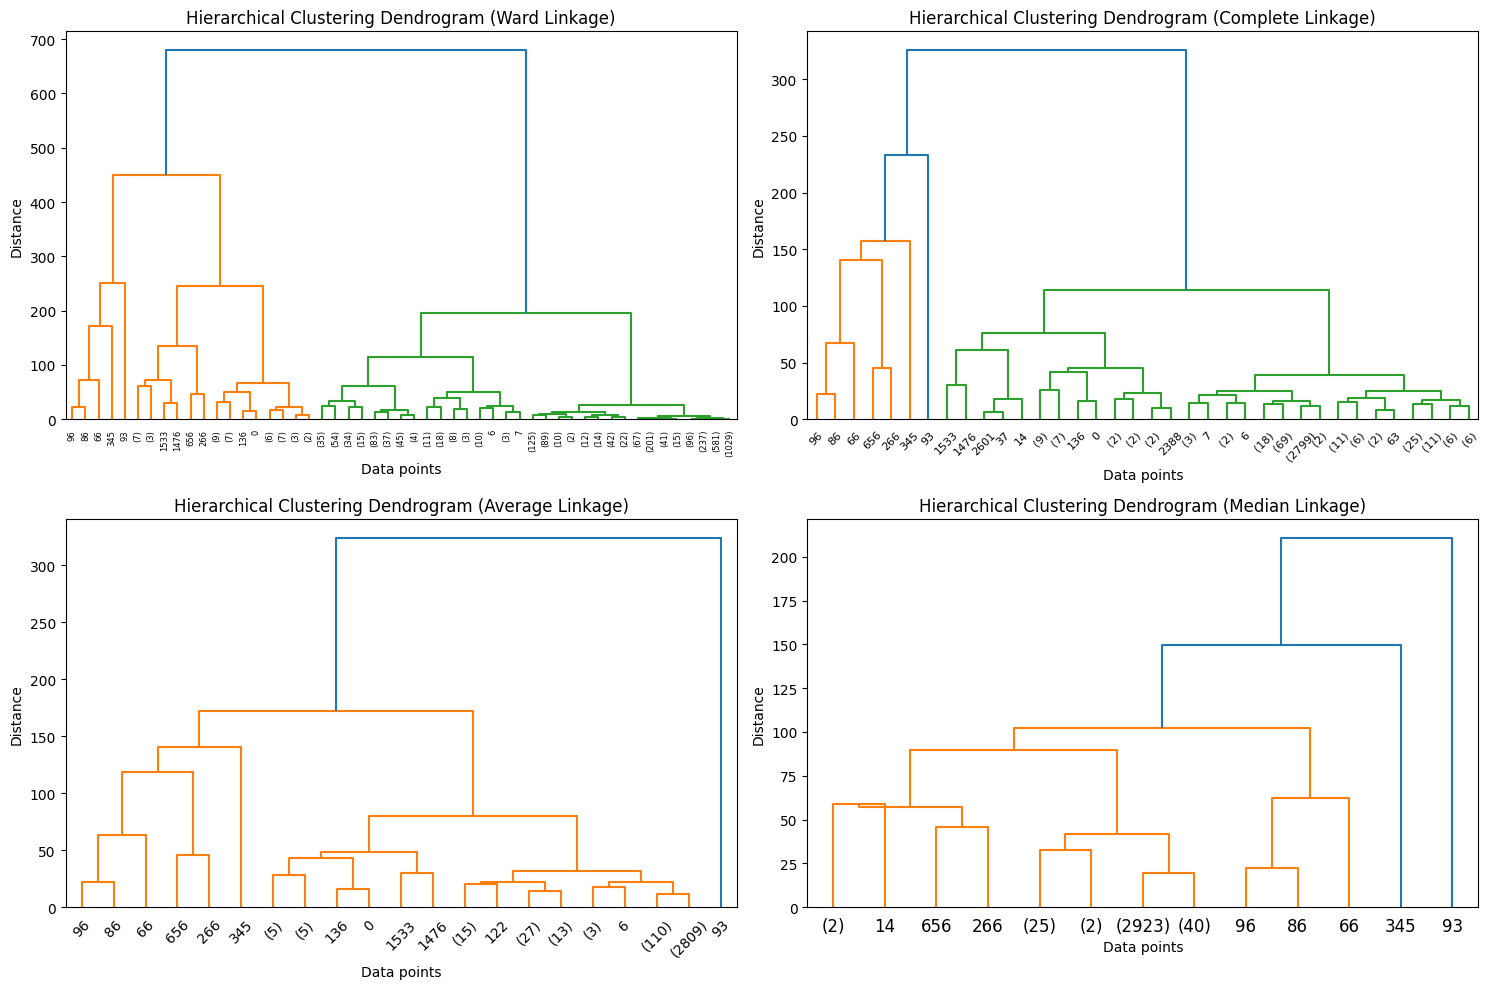

In [ ]:
hierarchical_clustering(data_scaled_smartseq)

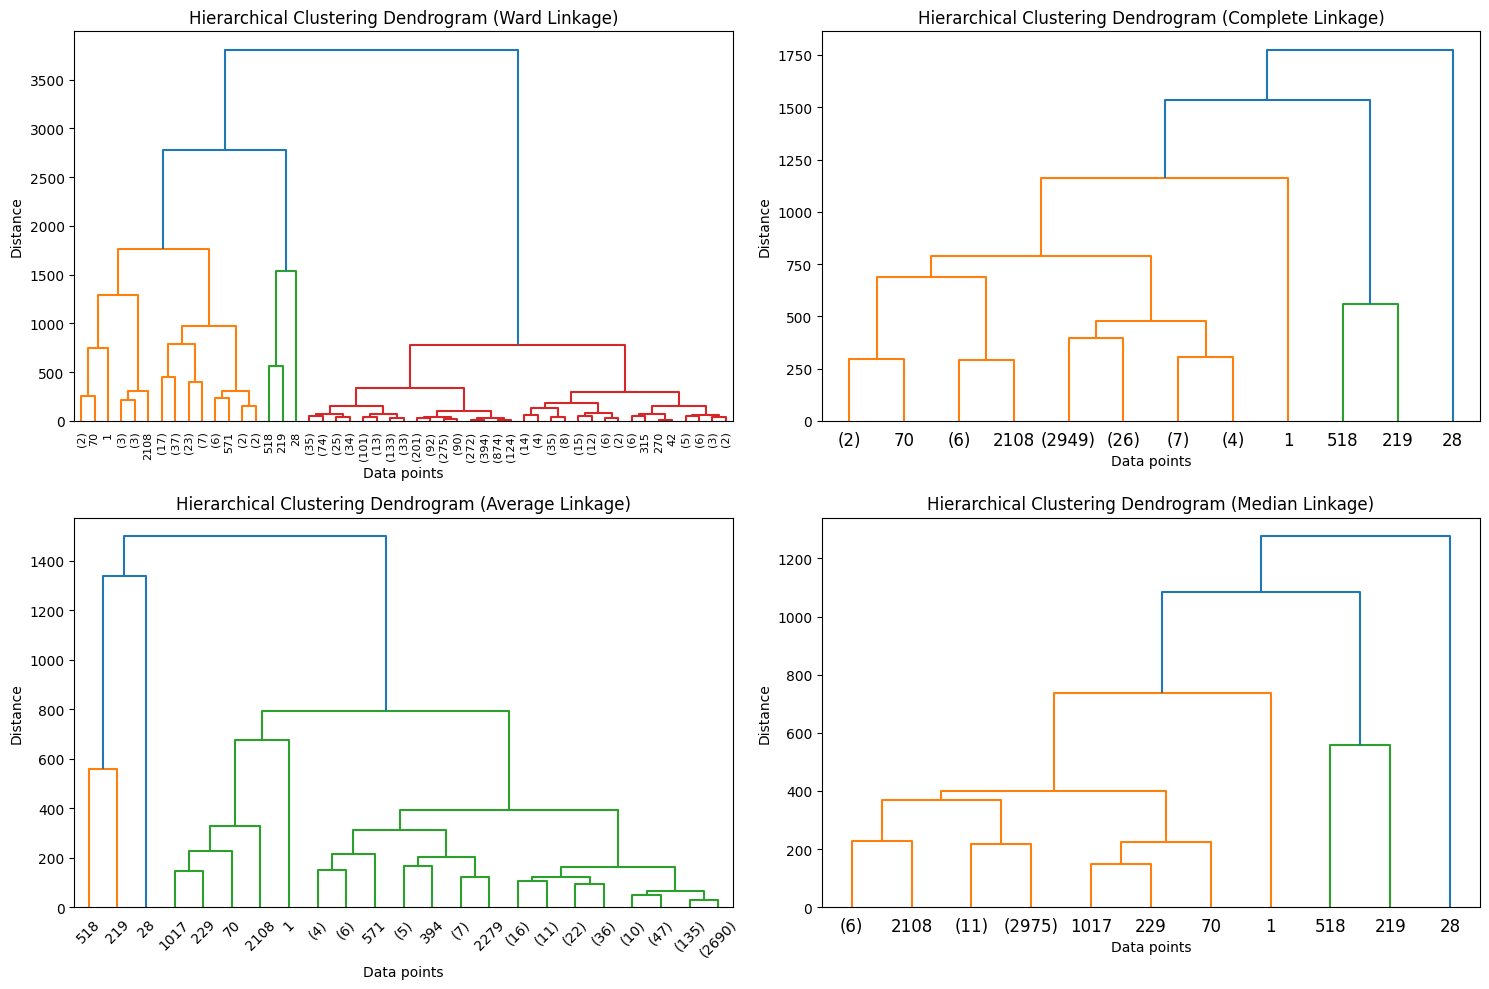

In [ ]:
hierarchical_clustering(data_scaled_dropseq)

# 4. Supervised learning

In this section we implement supervised learing algorithms.
For this aim we define X as all the features except the 'Target' column and Y as the 'Target' column.
Then we select a subset of this two for training (X_train and Y_train) and another for testing(X_test and Y_test).
Finally, we set up a K-Fold cross-validation iterator

For every model, we will define a function that will train it given the dataset. These functions will then keep track of the model, its parameters and metrics.

We define some auxilliary functions.

In [106]:
def load_dataset(dataset):
    X = dataset.drop(columns=['Target'])
    y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    return X, y, X_train, X_test, y_train, y_test, kfold

In [107]:
def plot_confusion_matrix(model, name):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(model['confusion_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In this section we implement the XGBoost algorithm (Extreme Gradient Boosting).

In [108]:
def run_xgboost(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'XGboost'

    # Define the parameter grid
    param_grid = {
        'max_depth': range(3, 10),
        'learning_rate': np.linspace(0.1, 1, 10),
        'n_estimators': range(10, 110, 10),
        'gamma': np.linspace(0, 0.5, 5),
        'subsample': np.linspace(0.5, 1, 6),
        'colsample_bytree': np.linspace(0.5, 1, 6),
        'min_child_weight': range(1, 6),
        'scale_pos_weight': range(1, 6)
    }

    xg_cl = XGBClassifier()


    # Instantiate RandomizedSearchCV
    random_search = RandomizedSearchCV(xg_cl, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                        n_jobs=-1, cv=kfold, random_state=123)

    # Fit the model
    random_search.fit(X, y)

    # Print/return the best parameters
    retval['parameters'] = random_search.best_params_

    #Now we implement the best model
    xgb_optm = xgb.XGBClassifier(objective='binary:logistic', **random_search.best_params_)
    retval['model'] = xgb_optm
    
    # Train the model
    xgb_optm.fit(X_train, y_train)

    # Make predictions on the test set
    xgb_predictions = xgb_optm.predict(X_test)
    retval['predictions'] = xgb_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test, xgb_predictions)
    retval['accuracy'] = accuracy
    #print("Accuracy:", accuracy)

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, xgb_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, xgb_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, xgb_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, xgb_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, xgb_predictions)
    retval['auc'] = auc

    return retval

Here we define an auxilliary function which we will use only on the xgb model.

In [109]:
def plot_feature_importance(model):
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(model['model'], max_num_features=10)  # You can adjust max_num_features as per your preference
    plt.title("Feature Importance")
    plt.show()

We now run the xgb algorithm on our 3 datasets (the complete one, as well as the two with reduced dimensionality), print the accuracy and plot the confusion matrix.

full
Accuracy: 0.972972972972973


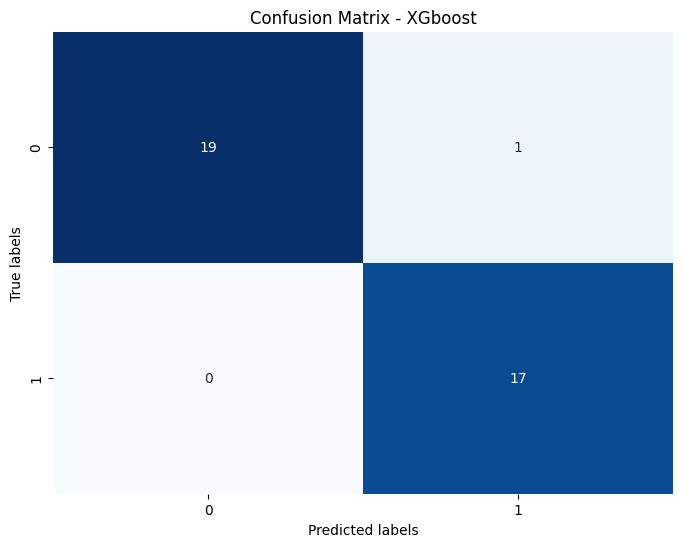

<Figure size 1000x600 with 0 Axes>

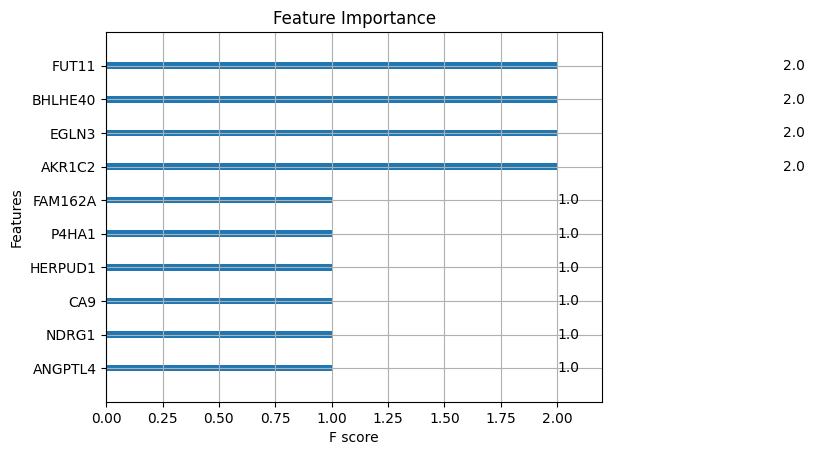

pca


KeyError: "['Target'] not found in axis"

In [113]:
for x in dataset_smartseq.keys():
    print(x)
    xgboost_smartseq = run_xgboost(dataset_smartseq[x])
    print(f"Accuracy: {xgboost_smartseq['accuracy']}")
    plot_confusion_matrix(xgboost_smartseq, xgboost_smartseq['name'])
    plot_feature_importance(xgboost_smartseq)

In [ ]:
for x in dataset_dropseq.keys():
    print(x)
    xgboost_dropseq = run_xgboost(dataset_dropseq[x])
    print(f"Accuracy: {xgboost_dropseq['accuracy']}")
    plot_confusion_matrix(xgboost_dropseq, xgboost_dropseq['name'])
    plot_feature_importance(xgboost_dropseq)

In this section we implemet the algorithm for K-Nearest Neighbors (KNN).

In [24]:
def run_kneighbors(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'KNN'
    
    param_grid = {
        'n_neighbors': range(1, 20),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    knn = KNeighborsClassifier()

    # Instantiate Gridsearch
    grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy',
                            n_jobs=-1, cv=kfold)

    # Fit the model
    grid_search.fit(X, y)

    # Print the best parameters
    retval['parameters'] = grid_search.best_params_

    knn_optm = KNeighborsClassifier(**grid_search.best_params_)
    retval['model'] = knn_optm

    # Train the KNN classifier
    knn_optm.fit(X_train, y_train)

    # Make predictions on the test set
    knn_predictions = knn_optm.predict(X_test)
    retval['predictions'] = knn_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test, knn_predictions)
    retval['accuracy'] = accuracy

    # Perform k-fold cross-validation
    cv_results = cross_val_score(knn_optm, X, y, cv=kfold, scoring='accuracy')

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, knn_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, knn_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, knn_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, knn_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, knn_predictions)
    retval['auc'] = auc

    return retval

Again, we train the model on the 3 datasets and plot the confusion matrices.

Accuracy: 1.0


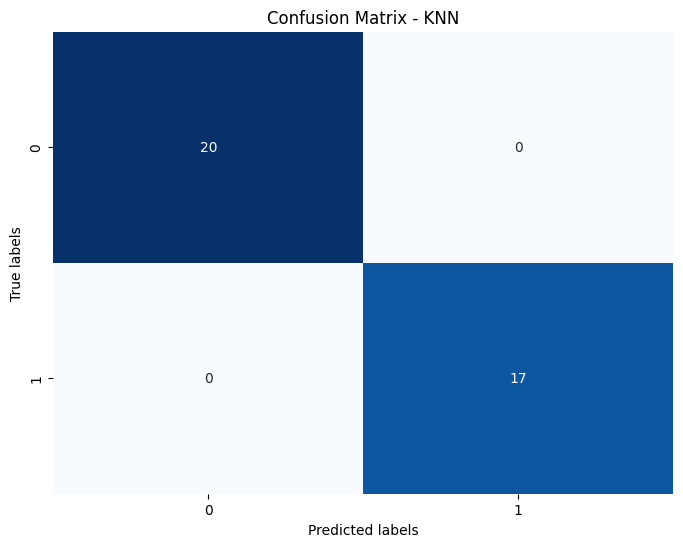

Accuracy: 0.8108108108108109


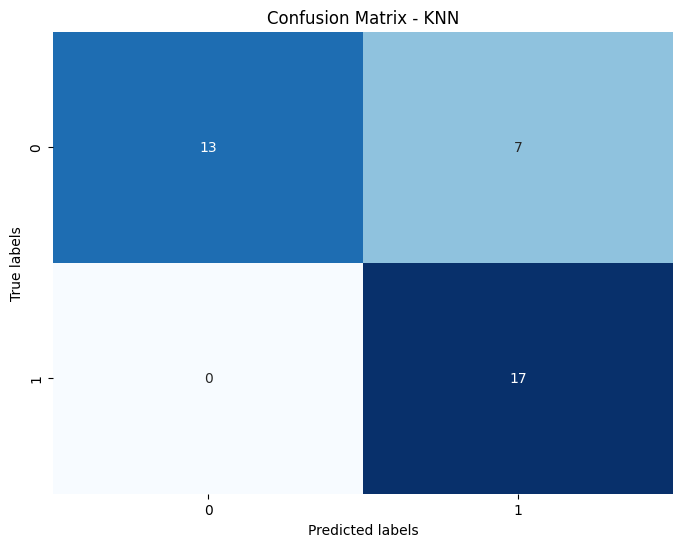

Accuracy: 1.0


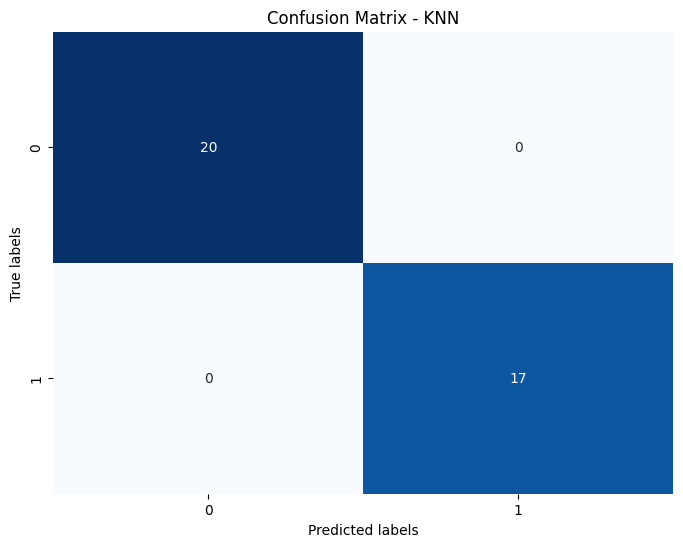

In [25]:
for x in dataset_smartseq.keys():
    print(x)
    kneighbors_smartseq = run_kneighbors(dataset_smartseq[x]) 
    print(f"Accuracy: {kneighbors_smartseq['accuracy']}")
    plot_confusion_matrix(kneighbors_smartseq, kneighbors_smartseq)


In [ ]:
# what is this???

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_smartseq['merged dataset'])
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

In [ ]:
for x in dataset_dropseq.keys():
    print(x)
    kneighbors_dropseq = run_kneighbors(dataset_dropseq[x])
    print(f"Accuracy: {kneighbors_dropseq['accuracy']}")
    plot_confusion_matrix(kneighbors_dropseq, kneighbors_dropseq['name'])

In [ ]:
# what is this???

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_dropseq['merged dataset'])
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

In this section we implemet the algorithm for Logistic regression classification.

In [27]:
def run_log_regression(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'Logistic Regression'
    # Define the parameter grid
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.linspace(0.1, 1, 10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

    log_reg = LogisticRegression()

    random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                        n_jobs=-1, cv=kfold, random_state=123)


    # Fit the model

    random_search.fit(X, y)

    # Print the best parameters
    retval['parameters'] = random_search.best_params_
 
    lr_optm = LogisticRegression(**random_search.best_params_)
    retval['model'] = lr_optm

    # Train the model
    lr_optm.fit(X_train, y_train)

    # Make predictions on the test set
    log_reg_predictions = lr_optm.predict(X_test)
    retval['predictions'] = log_reg_predictions

    # Calculate accuracy
    log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
    retval['accuracy'] = log_reg_accuracy

    # Perform k-fold cross-validation
    cv_results = cross_val_score(lr_optm, X, y, cv=kfold, scoring='accuracy')

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, log_reg_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, log_reg_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, log_reg_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, log_reg_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, log_reg_predictions)
    retval['auc'] = auc

    return retval

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Accuracy: 1.0


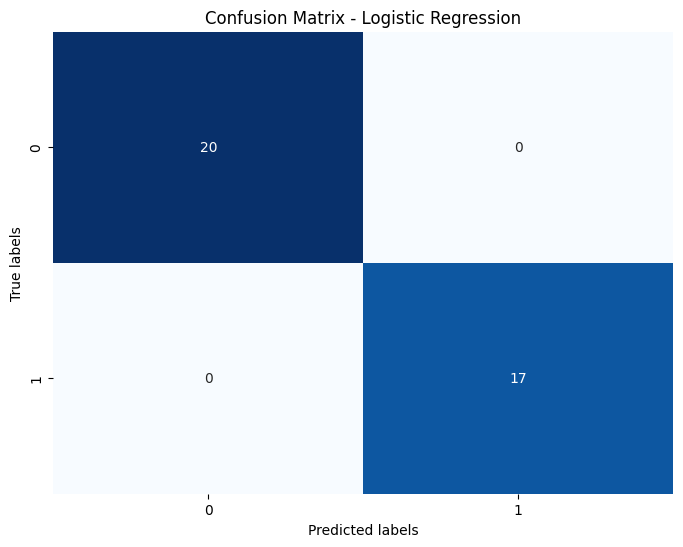

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Accuracy: 0.972972972972973


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

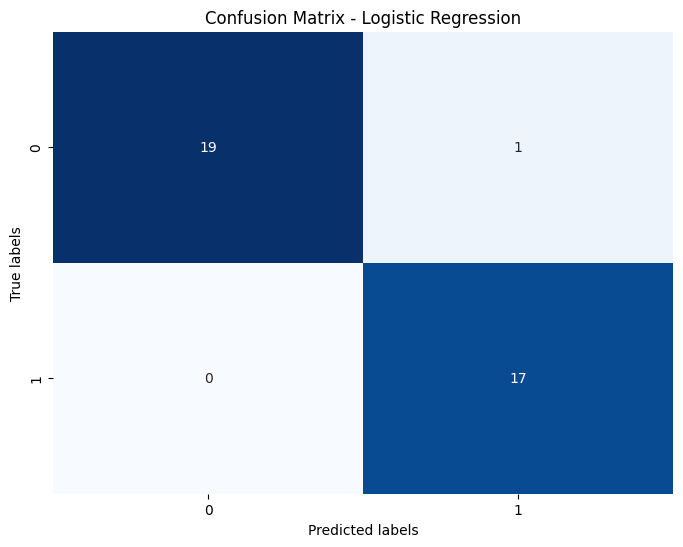

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Accuracy: 1.0


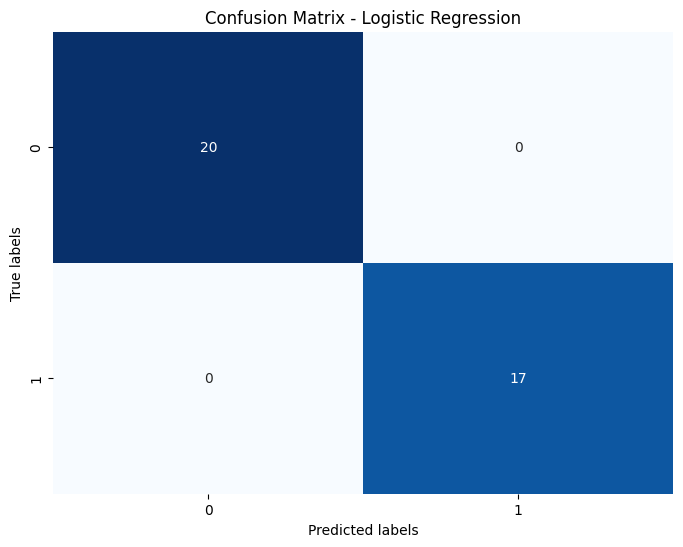

In [28]:
for x in dataset_smartseq.keys():
    print(x)
    log_regression_smartseq = run_log_regression(dataset_smartseq[x])
    print(f"Accuracy: {log_regression_smartseq['accuracy']}")
    plot_confusion_matrix(log_regression_smartseq, log_regression_smartseq['name'])

In [ ]:
for x in dataset_dropseq.keys():
    print(x)
    log_regression_dropseq = run_log_regression(dataset_smartseq[x])
    print(f"Accuracy: {log_regression_dropseq['accuracy']}")
    plot_confusion_matrix(log_regression_dropseq, log_regression_dropseq['name'])

RF

In [35]:
def run_random_forest(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'Random Forest'
    # We start by estimating the most important hyperparameter: the number of trees
    param_range = np.arange(1, 100, 10)
    train_scores, test_scores = validation_curve(
        RandomForestClassifier(random_state=42),
        X_train, y_train,
        param_name='n_estimators',
        param_range=param_range,
        cv=5,
        scoring='accuracy'
    )

    # We proceed to do a grid search to find the optimal hyperparameters with cross-validation
    param_grid = {
        'max_depth': np.arange(1, 10, 1),
        'min_samples_split': np.arange(2, 10, 1),
        'min_samples_leaf': np.arange(1, 10, 1)
    }
    grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 21, random_state=42), param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters
    retval['parameters']= grid_search.best_params_

    # Now we implement the best model
    rf_optm = RandomForestClassifier(n_estimators=21, random_state=42, **retval['parameters'])
    retval['model'] = rf_optm
    
    # Train the model
    rf_optm.fit(X_train, y_train)
    
    # Make predictions on the test set
    rf_predictions = rf_optm.predict(X_test)
    retval['predictions'] = rf_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test,rf_predictions)
    retval['accuracy'] = accuracy
    #print('Accuracy:', random_forest_accuracy)

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, rf_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, rf_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, rf_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, rf_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, rf_predictions)
    retval['auc'] = auc

    return retval

Accuracy: 1.0


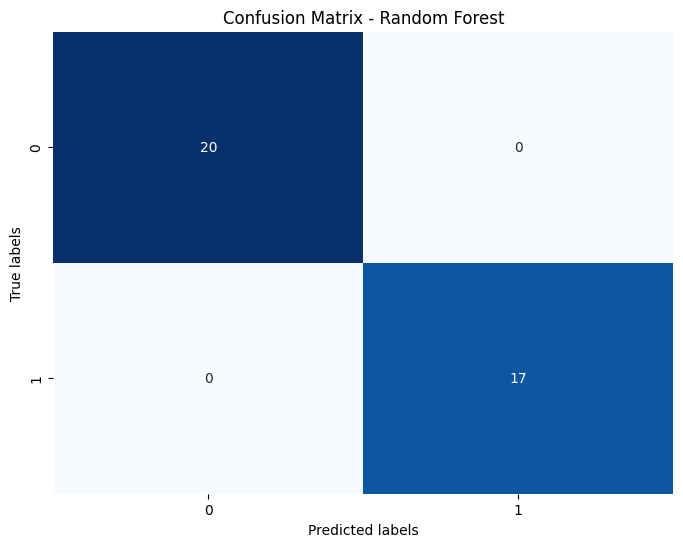

Accuracy: 0.918918918918919


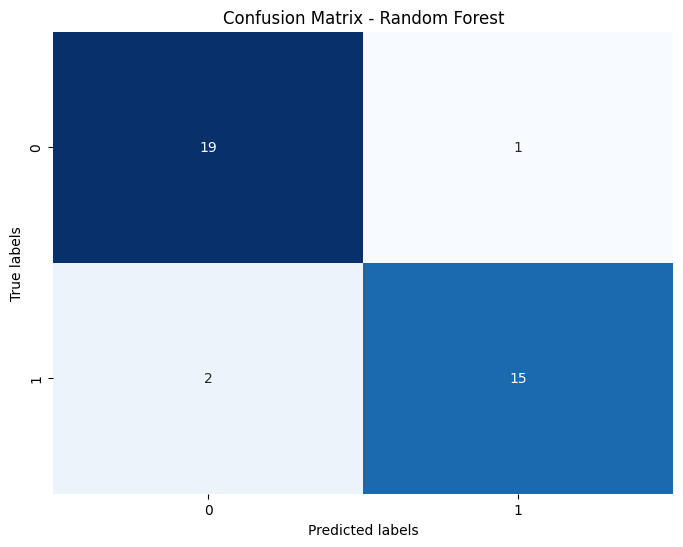

Accuracy: 0.9459459459459459


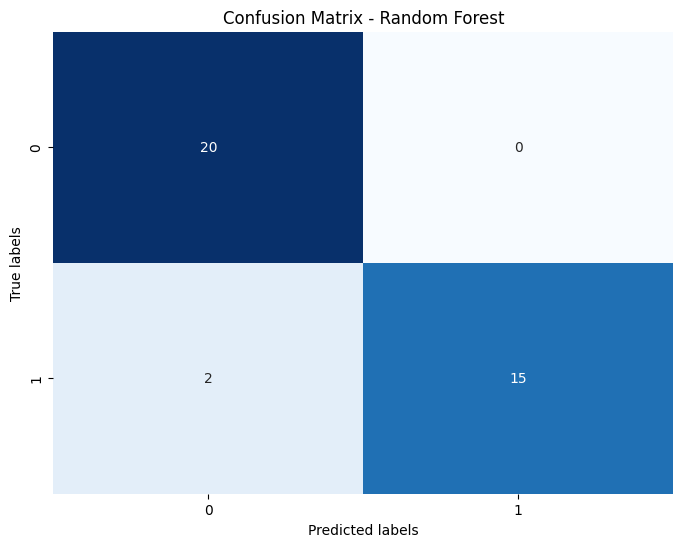

In [36]:
for x in dataset_smartseq.keys():
    print(x)
    rf_smartseq = run_random_forest(dataset_smartseq[x])
    print(f"Accuracy: {rf_smartseq['accuracy']}")
    plot_confusion_matrix(rf_smartseq, rf_smartseq['name'])

In [ ]:
# Initialize lists to store evaluation scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create subplots for confusion matrices and learning curves
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_smartseq['merged dataset'])

# Iterate over folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Classifier model
    merged_randomforest_smartseq = run_random_forest(dataset_smartseq['merged dataset'])
    rf = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_smartseq['parameters'])

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf.predict(X_test)

    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation scores for each fold
    print(f"\nFold {i+1} Evaluation Scores:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[i, 0])
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    axes[i, 0].set_title(f'Fold {i+1}: Confusion Matrix')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[i, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i, 1].set_xlabel("Training examples")
    axes[i, 1].set_ylabel("Score")
    axes[i, 1].set_title(f"Learning Curve (Fold {i+1})")
    axes[i, 1].legend(loc="best")
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

# Print mean evaluation scores across all folds
print("\nMean Evaluation Scores Across Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1-score:", np.mean(f1_scores))


In [ ]:
# Create a Random Forest Classifier model with the best parameters and enable OOB scoring
rf_OOB = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_smartseq['parameters'], oob_score=True)
# Fit the model to the entire dataset
rf_OOB.fit(X, y)
# Access the OOB score
oob_accuracy = rf_OOB.oob_score_
# Print OOB accuracy
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)

In [ ]:
for x in dataset_dropseq.keys():
    print(x)
    rf_dropseq = run_random_forest(dataset_dropseq[x])
    print(f"Accuracy: {rf_dropseq['accuracy']}")
    plot_confusion_matrix(rf_dropseq, rf_dropseq['name'])

In [ ]:
# Initialize lists to store evaluation scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create subplots for confusion matrices and learning curves
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_dropseq['merged dataset'])

# Iterate over folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Classifier model
    merged_randomforest_dropseq = run_random_forest(dataset_dropseq['merged dataset'])
    rf = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_dropseq['parameters'])

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf.predict(X_test)

    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation scores for each fold
    print(f"\nFold {i+1} Evaluation Scores:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[i, 0])
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    axes[i, 0].set_title(f'Fold {i+1}: Confusion Matrix')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[i, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i, 1].set_xlabel("Training examples")
    axes[i, 1].set_ylabel("Score")
    axes[i, 1].set_title(f"Learning Curve (Fold {i+1})")
    axes[i, 1].legend(loc="best")
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

# Print mean evaluation scores across all folds
print("\nMean Evaluation Scores Across Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1-score:", np.mean(f1_scores))


In [38]:
# Create a Random Forest Classifier model with the best parameters and enable OOB scoring
rf_OOB = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_dropseq['parameters'], oob_score=True)
# Fit the model to the entire dataset
rf_OOB.fit(X, y)
# Access the OOB score
oob_accuracy = rf_OOB.oob_score_
# Print OOB accuracy
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)

Out-of-Bag (OOB) Accuracy: 0.9615384615384616


SVM

In [41]:
def run_svm(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'SVM'

    # Define the parameter grid
    param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    
    svc_cl = SVC()

    # Initialize GridSearchCV with the SVC classifier and parameter grid
    grid = GridSearchCV(svc_cl, param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation

    # Perform grid search with cross-validation
    grid.fit(X_train, y_train)

    # Get the best parameters from the grid search
    retval['parameters'] = grid.best_params_

    #Now we implement the best model
    svm_optm = SVC(**grid.best_params_)
    retval['model'] = svm_optm

    #train the model
    svm_optm.fit(X_train, y_train)

    # Make predictions on the test set
    svm_predictions = svm_optm.predict(X_test)
    retval['predictions'] = svm_predictions

    #Calculate accuracy
    accuracy = accuracy_score(y_test, svm_predictions)
    retval['accuracy'] = accuracy
    #print("Accuracy:", accuracy)

    #Calculate precision# Create confusion matrix
    conf_matrix = confusion_matrix(y_test, svm_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, svm_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, svm_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, svm_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, svm_predictions)
    retval['auc'] = auc

    return retval



In [ ]:
def plot_svm_feature_importance(model):
    dataset = model['dataset']
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    feature_names = X_train.columns.tolist()

    # Check if the classifier is a linear SVM and has coefficients
    if hasattr(model['model'], 'coef_'):
        # Get feature importances (coefficients)
        feature_importance = model['model'].coef_[0]
        
        # Sort feature importances in descending order
        sorted_indices = np.argsort(np.abs(feature_importance))[::-1]
        sorted_feature_importance = feature_importance[sorted_indices]
        
        # Plot top 50 feature importances
        top_n = 50
        plt.figure(figsize=(12, 8))
        plt.bar(range(top_n), sorted_feature_importance[:top_n], align='center')
        plt.xticks(range(top_n), [feature_names[i] for i in sorted_indices[:top_n]], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Coefficient Magnitude')
        plt.title('Top 50 Feature Importance (Coefficients)')
        plt.tight_layout()
        plt.show()




Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

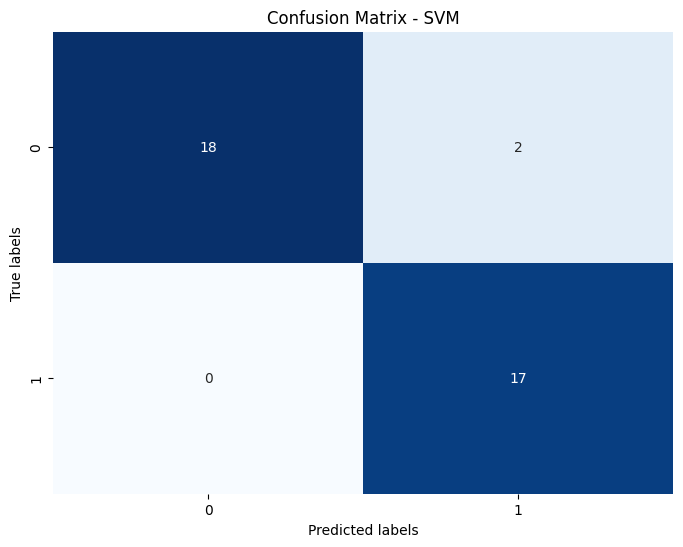

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.483 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

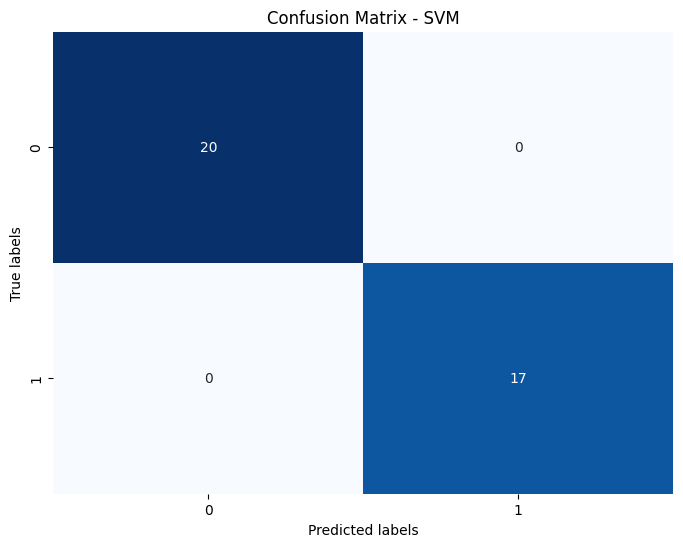

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.552 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.552 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.897 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

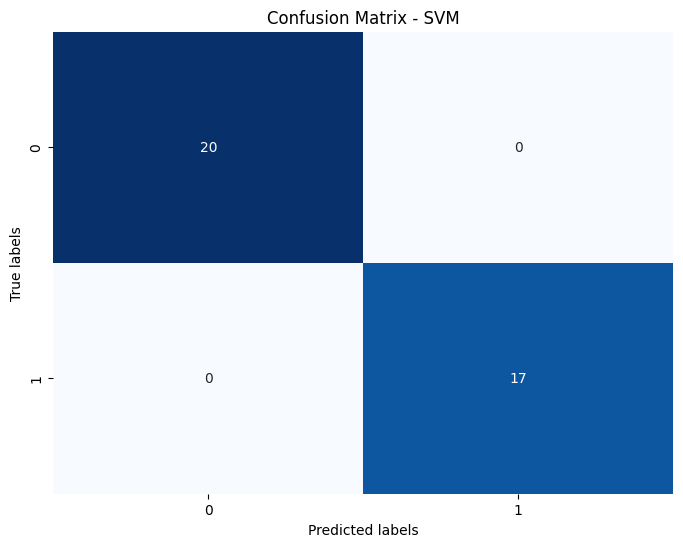

In [42]:
for x in dataset_smartseq.keys():
    print(x)
    svm_smartseq = run_svm(dataset_smartseq[x])
    print(f"Accuracy: {svm_smartseq['accuracy']}")
    plot_confusion_matrix(svm_smartseq, svm_smartseq['name'])


In [ ]:
plot_svm_feature_importance(run_svm(dataset_smartseq['merged dataset']))

In [ ]:
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_smartseq['merged dataset'])

# Reduce dimensionality of data to 3 dimensions using UMAP
umap_model = umap.UMAP(n_components=3)
X_train_3d_umap = umap_model.fit_transform(X_train)

# Train the SVM classifier on the reduced-dimensional data
best_svm_3d = SVC(C=0.01, gamma=1, kernel='linear', probability=True)
best_svm_3d.fit(X_train_3d_umap, y_train)

# Get the coefficients and intercept of the linear separator
coef = best_svm_3d.coef_
intercept = best_svm_3d.intercept_

# Define ranges for creating a smaller meshgrid
x_min, x_max = X_train_3d_umap[:, 0].min() - 1, X_train_3d_umap[:, 0].max() + 1
y_min, y_max = X_train_3d_umap[:, 1].min() - 1, X_train_3d_umap[:, 1].max() + 1
z_min, z_max = X_train_3d_umap[:, 2].min() - 1, X_train_3d_umap[:, 2].max() + 1

# Create a smaller meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Calculate corresponding z values for the linear separator
zz = (-coef[0, 0] * xx - coef[0, 1] * yy - intercept) / coef[0, 2]

# Create a 3D scatter plot for the data points
fig = px.scatter_3d(x=X_train_3d_umap[:, 0], y=X_train_3d_umap[:, 1], z=X_train_3d_umap[:, 2], color=y_train)

# Add decision boundary to the plot
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, showscale=False, opacity=0.5, colorscale='Blues'))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='UMAP Component 1',
                             yaxis_title='UMAP Component 2',
                             zaxis_title='UMAP Component 3'),
                  title='Decision Boundary and Linear Separator in 3D')

# Show the plot
fig.show()


In [ ]:
for x in dataset_dropseq.keys():
    print(x)
    svm_dropseq = run_svm(dataset_dropseq[x])
    print(f"Accuracy: {svm_dropseq['accuracy']}")
    plot_confusion_matrix(svm_dropseq, svm_dropseq['name'])

In [ ]:
plot_svm_feature_importance(run_svm(dataset_dropseq['merged dataset']))

In [ ]:
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_dropseq['merged dataset'])

# Reduce dimensionality of data to 3 dimensions using UMAP
umap_model = umap.UMAP(n_components=3)
X_train_3d_umap = umap_model.fit_transform(X_train)

# Train the SVM classifier on the reduced-dimensional data
best_svm_3d = SVC(C=0.01, gamma=1, kernel='linear', probability=True)
best_svm_3d.fit(X_train_3d_umap, y_train)

# Get the coefficients and intercept of the linear separator
coef = best_svm_3d.coef_
intercept = best_svm_3d.intercept_

# Define ranges for creating a smaller meshgrid
x_min, x_max = X_train_3d_umap[:, 0].min() - 1, X_train_3d_umap[:, 0].max() + 1
y_min, y_max = X_train_3d_umap[:, 1].min() - 1, X_train_3d_umap[:, 1].max() + 1
z_min, z_max = X_train_3d_umap[:, 2].min() - 1, X_train_3d_umap[:, 2].max() + 1

# Create a smaller meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Calculate corresponding z values for the linear separator
zz = (-coef[0, 0] * xx - coef[0, 1] * yy - intercept) / coef[0, 2]

# Create a 3D scatter plot for the data points
fig = px.scatter_3d(x=X_train_3d_umap[:, 0], y=X_train_3d_umap[:, 1], z=X_train_3d_umap[:, 2], color=y_train)

# Add decision boundary to the plot
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, showscale=False, opacity=0.5, colorscale='Blues'))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='UMAP Component 1',
                             yaxis_title='UMAP Component 2',
                             zaxis_title='UMAP Component 3'),
                  title='Decision Boundary and Linear Separator in 3D')

# Show the plot
fig.show()

In [ ]:
# SEQUENTIAL NN WITH KERAS

def run_nn(dataset, epochs):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'NN'
    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))
    nn_model.add(tf.keras.layers.Dense(128, activation='relu'))
    nn_model.add(tf.keras.layers.Dense(128, activation='relu'))
    nn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    retval['model'] = nn_model

    #Train the model
    nn_model.fit(X_train, y_train, epochs=epochs)

    #Make predictions on the test set
    nn_predictions = nn_model.predict(X_test)
    retval['predictions'] = nn_predictions

    # Calculate accuracy
    loss, accuracy = nn_model.evaluate(X_test, y_test)
    retval['accuracy'] = accuracy

    #Calculate Precision
    prec = precision_score(y_test, nn_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, nn_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, nn_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, nn_predictions)
    retval['auc'] = auc
    
    return retval
    


In [ ]:
for x in dataset_dropseq.keys():
    print(x)
    nn_dropseq = run_nn(dataset_dropseq[x], )
    print(f"Accuracy: {nn_dropseq['accuracy']}")
    plot_confusion_matrix(nn_dropseq, nn_dropseq['name'])

In [ ]:
for x in dataset_smartseq.keys():
    print(x)
    nn_smartseq = run_nn(dataset_smartseq[x], )
    print(f"Accuracy: {nn_smartseq['accuracy']}")
    plot_confusion_matrix(nn_smartseq, nn_smartseq['name'])

Pipeline for model comparison

In [208]:
merged_randomforest_smartseq = run_random_forest(dataset_smartseq['merged dataset'])
merged_svm_smartseq = run_svm(dataset_smartseq['merged dataset'])
merged_log_regression_smartseq = run_log_regression(dataset_smartseq['merged dataset'])
merged_kneighbors_smartseq = run_kneighbors(dataset_smartseq['merged dataset'])
merged_xgboost_smartseq = run_xgboost(dataset_smartseq['merged dataset'])
merged_nn_smartseq = run_nn(dataset_smartseq['merged dataset'])
model_pipleline_smartseq = []
model_pipleline_smartseq.append(merged_randomforest_smartseq)
model_pipleline_smartseq.append(merged_svm_smartseq) 
model_pipleline_smartseq.append(merged_log_regression_smartseq)
model_pipleline_smartseq.append(merged_kneighbors_smartseq)
model_pipleline_smartseq.append(merged_xgboost_smartseq)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.1s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To kee

In [210]:
# Create a metric of comparison for the models
model_names = []
acc_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []
auc_list = []

for model in model_pipleline_smartseq:
    
    # Name 
    model_names.append(model['name'])

    # Accuracy
    acc = model['accuracy']
    acc_list.append(f"{acc.mean().round(3)}±{acc.std().round(3)}")
    # Precision
    prec = model['precision']
    prec_list_n.append(f"{prec.mean().round(3)}±{prec.std().round(3)}")
    # Recall
    rec = model['recall']
    rec_list_n.append(f"{rec.mean().round(3)}±{rec.std().round(3)}")
    # F1 score
    f1 = model['f1']
    f1_list_n.append(f"{f1.mean().round(3)}±{f1.std().round(3)}")
    # AUC score
    auc = model['auc']
    auc_list.append(f"{auc.mean().round(3)}±{auc.std().round(3)}")

data_smartseq = {
'Model': model_names,
'Accuracy': acc_list,
'Precision': prec_list_n,
'Recall': rec_list_n,
'F1 Score': f1_list_n,
'AUC Score': auc_list
}

df_smartseq = pd.DataFrame(data_smartseq)

# Display DataFrame
print(df_smartseq)


                 Model   Accuracy  Precision   Recall   F1 Score  AUC Score
0        Random Forest    1.0±0.0    1.0±0.0  1.0±0.0    1.0±0.0    1.0±0.0
1                  SVM  0.946±0.0  0.895±0.0  1.0±0.0  0.944±0.0   0.95±0.0
2  Logistic Regression    1.0±0.0    1.0±0.0  1.0±0.0    1.0±0.0    1.0±0.0
3                  KNN    1.0±0.0    1.0±0.0  1.0±0.0    1.0±0.0    1.0±0.0
4              XGboost  0.973±0.0  0.944±0.0  1.0±0.0  0.971±0.0  0.975±0.0


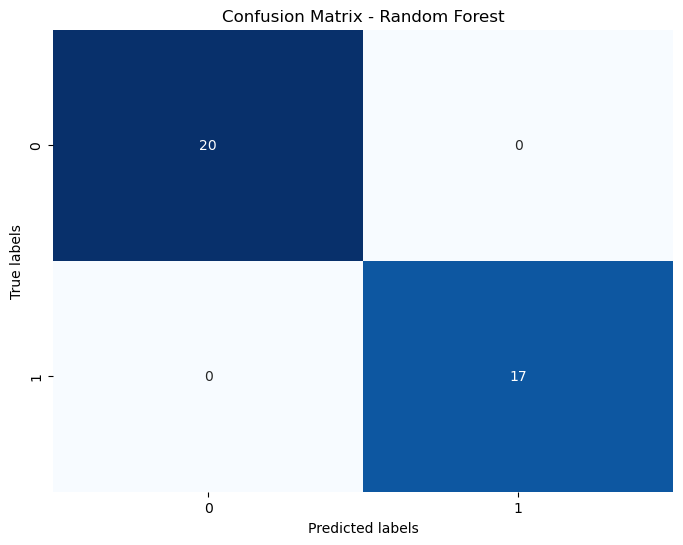

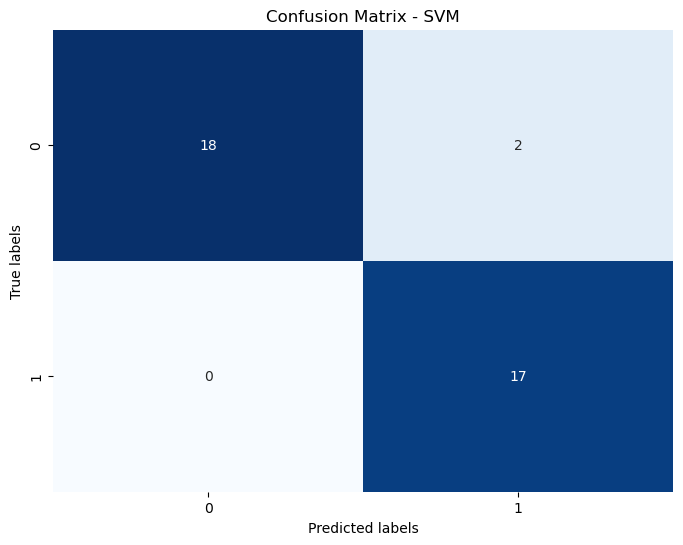

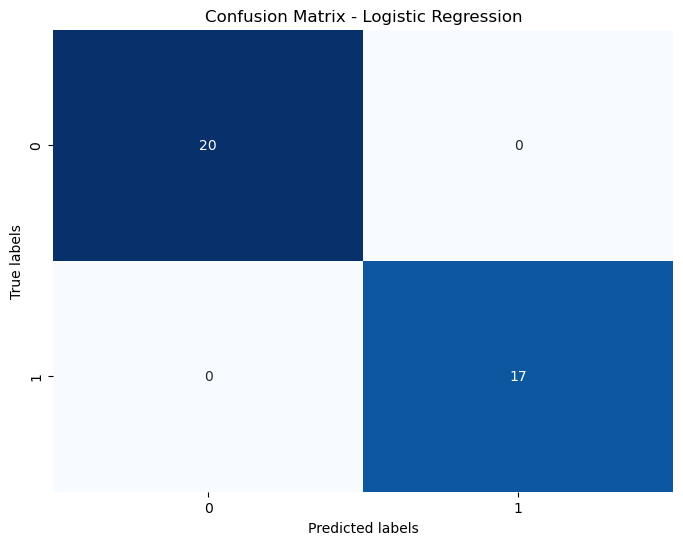

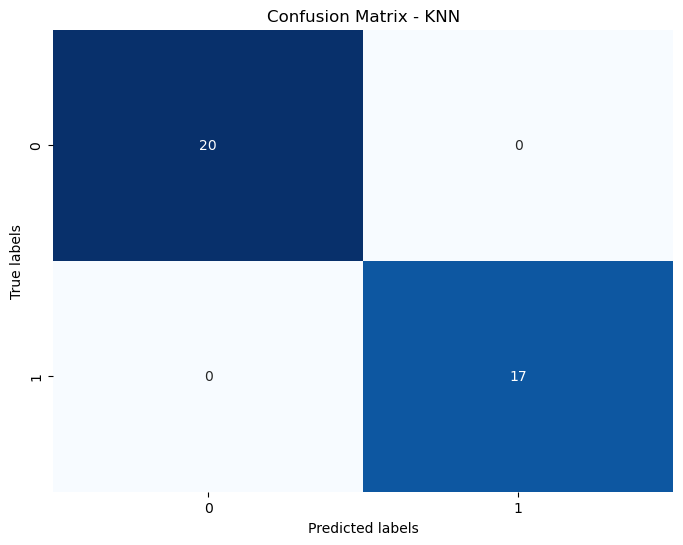

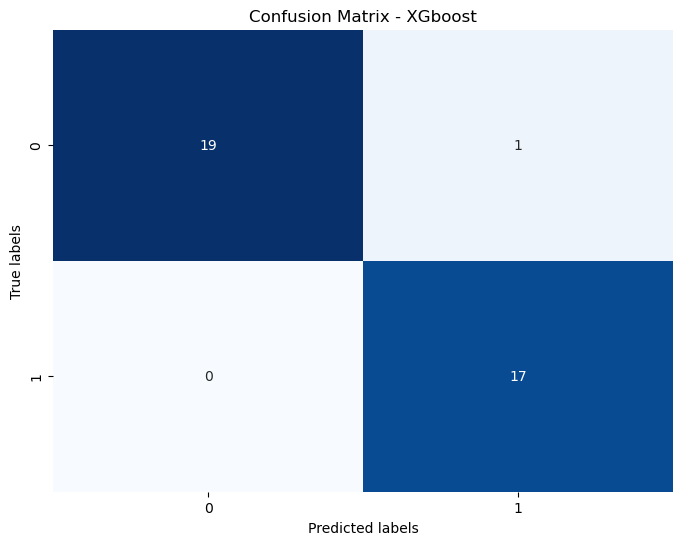

In [211]:
# we will now create plots for the five confusion matrices

for i, model in enumerate(model_pipleline_smartseq):
    plot_confusion_matrix(model, model['name'])

In [ ]:
merged_randomforest_dropseq = run_random_forest(dataset_dropseq['merged dataset'])
merged_svm_dropseq = run_svm(dataset_dropseq['merged dataset'])
merged_log_regression_dropseq = run_log_regression(dataset_dropseq['merged dataset'])
merged_kneighbors_dropseq = run_kneighbors(dataset_dropseq['merged dataset'])
merged_xgboost_dropseq = run_xgboost(dataset_dropseq['merged dataset'])
merged_nn_dropseq = run_nn(dataset_dropseq['merged dataset'])
model_pipleline_dropseq = []
model_pipleline_dropseq.append(merged_randomforest_dropseq)
model_pipleline_dropseq.append(merged_svm_dropseq) 
model_pipleline_dropseq.append(merged_log_regression_dropseq)
model_pipleline_dropseq.append(merged_kneighbors_dropseq)
model_pipleline_dropseq.append(merged_xgboost_dropseq)

In [ ]:
# Create a metric of comparison for the models
model_names = []
acc_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []
auc_list = []

for model in model_pipleline_dropseq:
    
    # Name 
    model_names.append(model['name'])

    # Accuracy
    acc = model['accuracy']
    acc_list.append(f"{acc.mean().round(3)}±{acc.std().round(3)}")
    # Precision
    prec = model['precision']
    prec_list_n.append(f"{prec.mean().round(3)}±{prec.std().round(3)}")
    # Recall
    rec = model['recall']
    rec_list_n.append(f"{rec.mean().round(3)}±{rec.std().round(3)}")
    # F1 score
    f1 = model['f1']
    f1_list_n.append(f"{f1.mean().round(3)}±{f1.std().round(3)}")
    # AUC score
    auc = model['auc']
    auc_list.append(f"{auc.mean().round(3)}±{auc.std().round(3)}")

data_dropseq = {
'Model': model_names,
'Accuracy': acc_list,
'Precision': prec_list_n,
'Recall': rec_list_n,
'F1 Score': f1_list_n,
'AUC Score': auc_list
}

df_dropseq = pd.DataFrame(data_dropseq)

# Display DataFrame
print(df_dropseq)


In [ ]:
# we will now create plots for the five confusion matrices

for i, model in enumerate(model_pipleline_dropseq):
    plot_confusion_matrix(model, model['name'])